In [1]:
import networkx as nx
import numpy as np
import polars as pl
import powerlaw
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from collections import Counter
from itertools import combinations

DATA_PATH = '/data'

# Create citation network

In [2]:
# read
FIELD_NAMES = ['Physics', 'History']
field_name = FIELD_NAMES[0]  # in case of Physics


In [9]:
gs = {}
for field_name in FIELD_NAMES:
    # create directed graph
    g_citation_lcc = nx.read_edgelist(f'data/{field_name}/citation_lcc.edgelist', create_using=nx.DiGraph)

    # add to dict
    gs[field_name] = g_citation_lcc

In [4]:
for f, g in gs.items():
    print(f, g.number_of_nodes(), g.number_of_edges())

Physics 148769 529272
History 902 968


# Descriptive statistics

### Degree distribution

In [5]:
def compare_distributions(fit, dist1: str ='power_law', dist2: str ='lognormal'):
    # compare distribution
    print('== compare distribution ==')
    R, p = fit.distribution_compare(dist1, dist2)
    if p <= 0.05:
        print('HIGHLY')
    if R >= 0:
        print(dist1)
    else:
        print(dist2)
    print(f"R: {R}, p-value: {p}")
    return R, p

def plot_distribution(fit, ax=None):
    fig, ax = plt.subplots()
    # plot empirical data
    ax = fit.plot_ccdf(ax, linewidth=3, label='Empirical data')
    # plot fit
    fit.lognormal_positive.plot_ccdf(ax=ax, color='g', linestyle='--', label='Fit(lognormal)')

    plt.xlabel('degree')
    plt.ylabel(u"p(X≥x)")
    ax.legend()


Calculating best minimal value for power law fit
== compare distribution ==
lognormal
R: -0.258254249316308, p-value: 0.3600941304754396


/home/kk929/.cache/pypoetry/virtualenvs/class-network-Bf3B6n9_-py3.11/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
/home/kk929/.cache/pypoetry/virtualenvs/class-network-Bf3B6n9_-py3.11/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


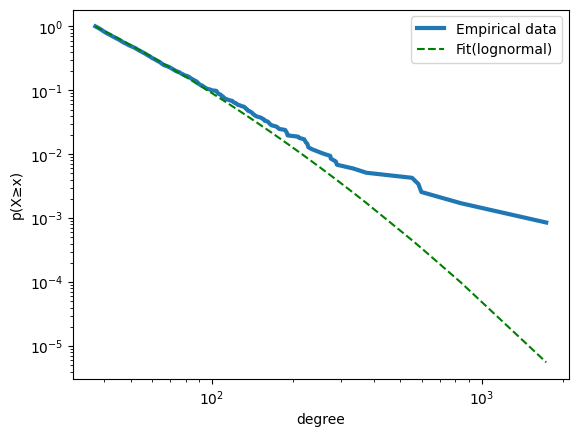

In [6]:
# physics
g_selected = gs['Physics']
indegree_values = list(dict(g_selected.in_degree()).values())
# fitting
data = np.array(indegree_values)
data = data[data != 0] # drop 0
fit = powerlaw.Fit(data)

R, p = compare_distributions(fit)

plot_distribution(fit)

Calculating best minimal value for power law fit
== compare distribution ==
lognormal
R: -0.6513003947423137, p-value: 0.3385670478692616


/home/kk929/.cache/pypoetry/virtualenvs/class-network-Bf3B6n9_-py3.11/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


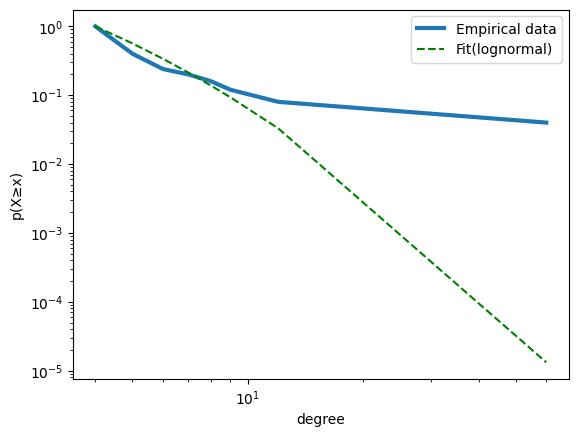

In [7]:
# physics
g_selected = gs['History']
indegree_values = list(dict(g_selected.in_degree()).values())
# fitting
data = np.array(indegree_values)
data = data[data != 0] # drop 0
fit = powerlaw.Fit(data)

R, p = compare_distributions(fit)

plot_distribution(fit)

# Visualize 

(it should be done by [cytoscape](https://cytoscape.org/)/[gephi](https://gephi.org/)/other tools ...)

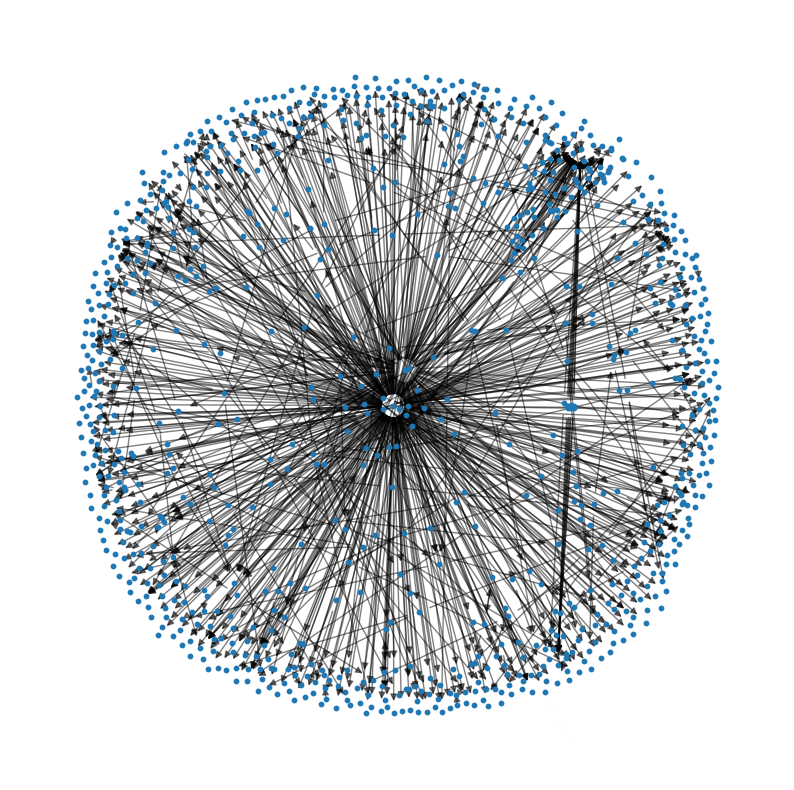

In [8]:
# plot network (History) it can be done because it is small
g_selected = gs['History']
# plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g_selected, k=0.1)
nx.draw_networkx_nodes(g_selected, pos, node_size=10)
nx.draw_networkx_edges(g_selected, pos, alpha=0.5)
plt.axis('off')
plt.show()
